In [1]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

In [22]:
batch=32
lr=0.01
hidden_layers = [300,200]
output_size = 10

In [23]:

trainset = datasets.MNIST('./dataset/MNIST', train=True, transform=transform, download=True)
trainloader = DataLoader(trainset, batch_size=batch, shuffle=True)

testset = datasets.MNIST('./dataset/MNIST', train=False, transform=transform, download=True)
testloader = DataLoader(testset, batch_size=batch, shuffle=True)

input_size = trainloader.dataset.train_data.shape[1] * trainloader.dataset.train_data.shape[2]

In [ ]:
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.uniform_(m.weight,-1.0,1.0)

In [25]:
model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_layers[0]),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_layers[0], hidden_layers[1]),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_layers[1], output_size),
    torch.nn.LogSoftmax(dim=1)
)
model.apply(init_weights)
# print(model)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

epochs = 50
losses = []
for e in range(epochs):
    running_loss = 0
    for x, y in trainloader:
        
        x = x.view(x.shape[0], -1)
        
        optimizer.zero_grad()        
        output = model(x)
        loss = criterion(output, y)
        
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch: {e+1}, Running loss: {running_loss/len(trainloader)}")
    losses.append(running_loss/len(trainloader))

    correct=0
    with torch.no_grad():
        for images,labels in testloader:
            logps = model(images.view(images.shape[0], -1))
            output = torch.squeeze(logps)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(labels.data.view_as(pred)).sum()
    # print(f"Test Accuracy Percent: {100. * correct / len(testloader.dataset)} %")
    print(f"Test Error Percent: {100 - (100. * correct / len(testloader.dataset))} %")

Epoch: 1, Running loss: 1.8129346528922572
Test Error Percent: 34.400001525878906 %
Epoch: 2, Running loss: 0.920786334189779
Test Error Percent: 25.800003051757812 %
Epoch: 3, Running loss: 0.7352039508664532
Test Error Percent: 21.80999755859375 %
Epoch: 4, Running loss: 0.6408132784275103
Test Error Percent: 19.519996643066406 %
Epoch: 5, Running loss: 0.5803064330300288
Test Error Percent: 17.81999969482422 %
Epoch: 6, Running loss: 0.5372051700060048
Test Error Percent: 16.589996337890625 %
Epoch: 7, Running loss: 0.5045609448287787
Test Error Percent: 15.569999694824219 %
Epoch: 8, Running loss: 0.47828808477692514
Test Error Percent: 15.0 %
Epoch: 9, Running loss: 0.45629421280009913
Test Error Percent: 14.389999389648438 %
Epoch: 10, Running loss: 0.4376131148417113
Test Error Percent: 13.959999084472656 %
Epoch: 11, Running loss: 0.42163564720705377
Test Error Percent: 13.470001220703125 %
Epoch: 12, Running loss: 0.4077888297151401
Test Error Percent: 13.080001831054688 %
Epo

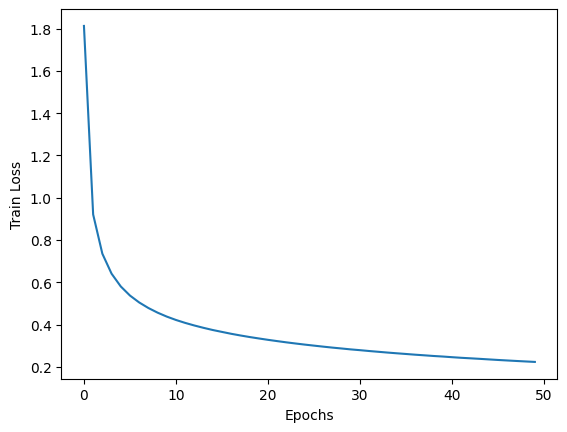

In [26]:
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.plot(losses)
plt.show()